In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
Walmart_data=pd.read_csv('D:/simplilearn projects/Walmart_Store_sales.csv')

In [3]:
Walmart_data


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


In [4]:
Walmart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [5]:
#checking for missing values
Walmart_data.isna().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of       Store   Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0     False  False         False         False        False       False   
1     False  False         False         False        False       False   
2     False  False         False         False        False       False   
3     False  False         False         False        False       False   
4     False  False         False         False        False       False   
...     ...    ...           ...           ...          ...         ...   
6430  False  False         False         False        False       False   
6431  False  False         False         False        False       False   
6432  False  False         False         False        False       False   
6433  False  False         False         False        False       False   
6434  False  False         False         False        False       False   

        CPI  Unemployment  
0     Fal

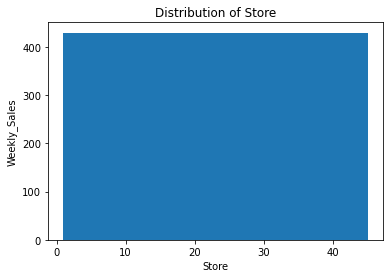

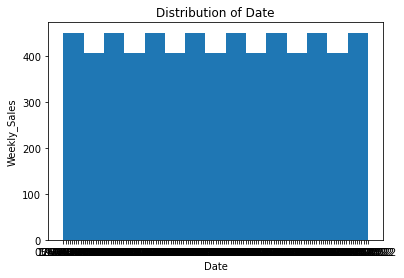

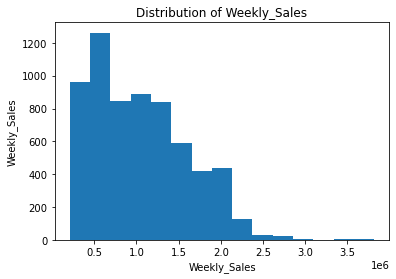

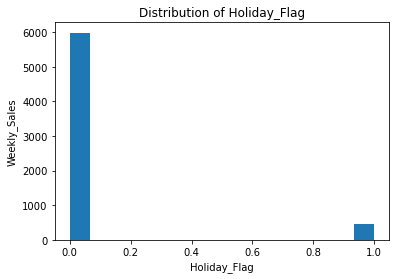

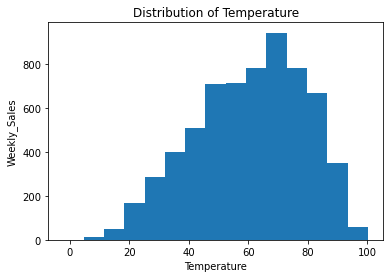

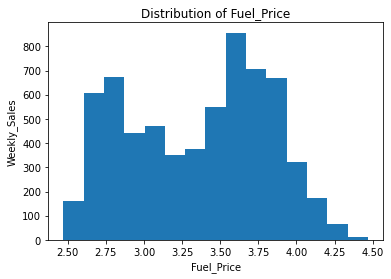

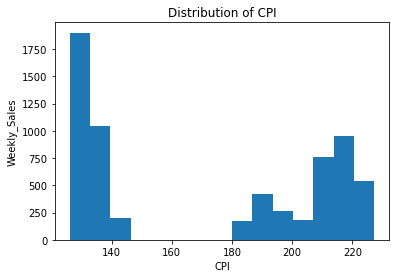

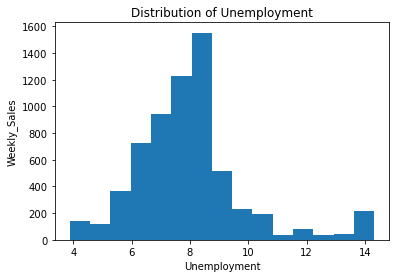

In [6]:
#EDA exploratory data analysis
#histogram
for column in Walmart_data.columns:
    plt.hist(Walmart_data[column] ,bins= 15)
    plt.title(f"Distribution of {column}")
    plt.xlabel(column)
    plt.ylabel("Weekly_Sales")
    plt.show()

the histogram of dataset shows taht the variables are skewed and had outliers in it


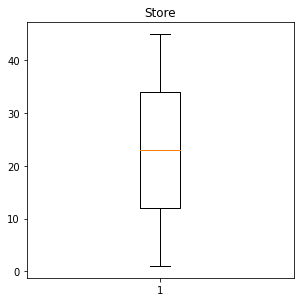

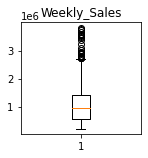

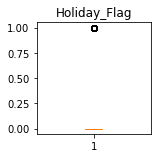

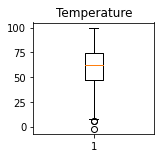

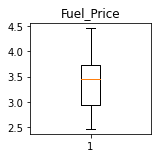

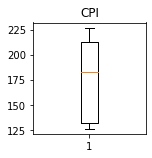

In [7]:
#boxplot of all the numerical columns in the dataset
numerical_columns=Walmart_data.select_dtypes(include=['int64', 'float64'])
plt.figure(figsize=(12,8))
for i,column in enumerate(numerical_columns.columns):
    if i < 6:
        plt.subplot(2, 3, i + 1)
        plt.boxplot(numerical_columns[column])
        plt.title(column)
        plt.tight_layout()
        plt.show()

In [8]:
#Task1
#Which store has maximum sales
max_sales=Walmart_data.loc[Walmart_data['Weekly_Sales'].idxmax()]
max_sales_store=max_sales['Store']
max_weekly_sales=max_sales['Weekly_Sales']

print(f"The store with max sales {max_sales_store} with its maxium weekly sales {max_weekly_sales}")

The store with max sales 14 with its maxium weekly sales 3818686.45


#task2
Which store has maximum standard deviation i.e., the sales vary a lot. Also, find out the coefficient of mean to standard deviation

In [9]:
#Standard deviation of weekly sales from each store
std_store=Walmart_data.groupby('Store')['Weekly_Sales'].std()
#Maximum standard deviation 
store_with_max_std=std_store.idxmax()
max_std=std_store.max()
print(f"store with maximum standard deviation {store_with_max_std} with maximum standard deviation of sales is {max_std:.2f}")


store with maximum standard deviation 14 with maximum standard deviation of sales is 317569.95


#coefficient of mean to standard deviation
coefficient of mean to standard deviation = (mean/standard deviation)*100

In [10]:
mean_std= Walmart_data[Walmart_data['Store']==store_with_max_std]['Weekly_Sales'].mean()
coeffiecient_of_variation=( mean_std/max_std)*100
print(f"{coeffiecient_of_variation:.2f}")

636.39


In [11]:
unique_dates=Walmart_data['Date'].unique()
unique_dates


array(['05-02-2010', '12-02-2010', '19-02-2010', '26-02-2010',
       '05-03-2010', '12-03-2010', '19-03-2010', '26-03-2010',
       '02-04-2010', '09-04-2010', '16-04-2010', '23-04-2010',
       '30-04-2010', '07-05-2010', '14-05-2010', '21-05-2010',
       '28-05-2010', '04-06-2010', '11-06-2010', '18-06-2010',
       '25-06-2010', '02-07-2010', '09-07-2010', '16-07-2010',
       '23-07-2010', '30-07-2010', '06-08-2010', '13-08-2010',
       '20-08-2010', '27-08-2010', '03-09-2010', '10-09-2010',
       '17-09-2010', '24-09-2010', '01-10-2010', '08-10-2010',
       '15-10-2010', '22-10-2010', '29-10-2010', '05-11-2010',
       '12-11-2010', '19-11-2010', '26-11-2010', '03-12-2010',
       '10-12-2010', '17-12-2010', '24-12-2010', '31-12-2010',
       '07-01-2011', '14-01-2011', '21-01-2011', '28-01-2011',
       '04-02-2011', '11-02-2011', '18-02-2011', '25-02-2011',
       '04-03-2011', '11-03-2011', '18-03-2011', '25-03-2011',
       '01-04-2011', '08-04-2011', '15-04-2011', '22-04

In [12]:
#task 3#Which store/s has good quarterly growth rate in Q3’2012

Walmart_data['Date']=pd.to_datetime(Walmart_data['Date'],format='%d-%m-%Y')
Walmart_data['Date']
# Filtering the quarter 3 data 
q3_data=Walmart_data[(Walmart_data['Date']>='2012-07-01')&(Walmart_data['Date']<='2012-09-30')]
q3_data



,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
126,1,2012-07-06,1769854.16,0,81.57,3.227,221.883779,6.908
127,1,2012-07-13,1527014.04,0,77.12,3.256,221.924158,6.908
128,1,2012-07-20,1497954.76,0,80.42,3.311,221.932727,6.908
129,1,2012-07-27,1439123.71,0,82.66,3.407,221.941295,6.908
130,1,2012-08-03,1631135.79,0,86.11,3.417,221.949864,6.908
...,...,...,...,...,...,...,...,...
6426,45,2012-08-31,734297.87,0,75.09,3.867,191.461281,8.684
6427,45,2012-09-07,766512.66,1,75.70,3.911,191.577676,8.684
6428,45,2012-09-14,702238.27,0,67.87,3.948,191.699850,8.684
6429,45,2012-09-21,723086.20,0,65.32,4.038,191.856704,8.684


In [13]:
q2_data=Walmart_data[(Walmart_data['Date']>='2012-04-01')&(Walmart_data['Date']<='2012-06-30')]
q2_data

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
113,1,2012-04-06,1899676.88,0,70.43,3.891,221.435611,7.143
114,1,2012-04-13,1621031.70,0,69.07,3.891,221.510210,7.143
115,1,2012-04-20,1521577.87,0,66.76,3.877,221.564074,7.143
116,1,2012-04-27,1468928.37,0,67.23,3.814,221.617937,7.143
117,1,2012-05-04,1684519.99,0,75.55,3.749,221.671800,7.143
...,...,...,...,...,...,...,...,...
6413,45,2012-06-01,837144.63,0,74.48,3.742,191.009171,8.567
6414,45,2012-06-08,795133.00,0,64.30,3.689,191.015533,8.567
6415,45,2012-06-15,821498.18,0,71.93,3.620,191.029973,8.567
6416,45,2012-06-22,822569.16,0,74.22,3.564,191.064610,8.567


In [14]:
q3_sales=q3_data.groupby('Store')['Weekly_Sales'].sum()
q2_sales=q2_data.groupby('Store')['Weekly_Sales'].sum()
quarterly_growth_rate=(q3_sales-q2_sales)/q2_sales*100
quarterly_good_growth_rate=quarterly_growth_rate[quarterly_growth_rate==quarterly_growth_rate.max()]
print(f"the store with  quarterly growth rate q3 in 2012 with its sales growth are:\n {quarterly_good_growth_rate} ")

the store with  quarterly growth rate q3 in 2012 with its sales growth are:
 Store
7    13.330776
Name: Weekly_Sales, dtype: float64 


In [15]:
#task4
#Find out holidays which have higher sales than the mean sales in non-holiday season for all stores together

Holidays=['2010-02-12', '2011-02-11', '2012-02-10', '2013-02-08',
            '2010-09-10', '2011-09-09', '2012-09-07', '2013-09-06',
            '2010-11-26', '2011-11-25', '2012-11-23', '2013-11-29',
            '2010-12-31', '2011-12-30', '2012-12-28', '2013-12-27']
#1- holiday week, 0 -non holiday week
# calculating the mean  sales valuesare of non-holidays
non_holidays_sales=Walmart_data[Walmart_data['Holiday_Flag']==0]['Weekly_Sales'].mean()
# calculating the  total sum of holidays
holiday_sales=Walmart_data[Walmart_data['Date'].isin(Holidays)]['Weekly_Sales'].sum()
# finding holidays with higher sales
higher_sales=[str(date) for date in Holidays if Walmart_data [Walmart_data['Date']==date]['Weekly_Sales'].sum() >non_holidays_sales]
higher_sales

['2010-02-12',
 '2011-02-11',
 '2012-02-10',
 '2010-09-10',
 '2011-09-09',
 '2012-09-07',
 '2010-11-26',
 '2011-11-25',
 '2010-12-31',
 '2011-12-30']

In [16]:
#task 5
#Provide a monthly and semester view of sales 
Walmart_data['Month']=Walmart_data['Date'].dt.month
Walmart_data['Semister']=(Walmart_data['Month']-1)//6 +1

#monthly sales
monthly_sales=Walmart_data.groupby('Month')['Weekly_Sales'].sum()
#semister sales
semister_sales=Walmart_data.groupby('Semister')['Weekly_Sales'].sum()

pd.options.display.float_format = '{:.2f}'.format

print(f"monthly sales are \n{monthly_sales}")
print(f"semister wise sales are\n{semister_sales}")


monthly sales are 
Month
1    332598438.49
2    568727890.45
3    592785901.28
4    646859784.97
5    557125571.95
6    622629886.84
7    650000977.25
8    613090208.82
9    578761179.26
10   584784787.59
11   413015725.01
12   576838635.20
Name: Weekly_Sales, dtype: float64
semister wise sales are
Semister
1   3320727473.98
2   3416491513.13
Name: Weekly_Sales, dtype: float64


In [17]:
Walmart_data['days']=(Walmart_data['Date']-Walmart_data['Date'].min()).dt.days
print(Walmart_data[['Date','days']])

           Date  days
0    2010-02-05     0
1    2010-02-12     7
2    2010-02-19    14
3    2010-02-26    21
4    2010-03-05    28
...         ...   ...
6430 2012-09-28   966
6431 2012-10-05   973
6432 2012-10-12   980
6433 2012-10-19   987
6434 2012-10-26   994

[6435 rows x 2 columns]


In [18]:
Walmart_data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Month,Semister,days
0,1,2010-02-05,1643690.90,0,42.31,2.57,211.10,8.11,2,1,0
1,1,2010-02-12,1641957.44,1,38.51,2.55,211.24,8.11,2,1,7
2,1,2010-02-19,1611968.17,0,39.93,2.51,211.29,8.11,2,1,14
3,1,2010-02-26,1409727.59,0,46.63,2.56,211.32,8.11,2,1,21
4,1,2010-03-05,1554806.68,0,46.50,2.62,211.35,8.11,3,1,28


In [19]:
Walmart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
 8   Month         6435 non-null   int64         
 9   Semister      6435 non-null   int64         
 10  days          6435 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(5)
memory usage: 553.1 KB


In [21]:
#task 6
Store1_data=Walmart_data[Walmart_data['Store']==1]
Store1_data

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Month,Semister,days
0,1,2010-02-05,1643690.90,0,42.31,2.57,211.10,8.11,2,1,0
1,1,2010-02-12,1641957.44,1,38.51,2.55,211.24,8.11,2,1,7
2,1,2010-02-19,1611968.17,0,39.93,2.51,211.29,8.11,2,1,14
3,1,2010-02-26,1409727.59,0,46.63,2.56,211.32,8.11,2,1,21
4,1,2010-03-05,1554806.68,0,46.50,2.62,211.35,8.11,3,1,28
...,...,...,...,...,...,...,...,...,...,...,...
138,1,2012-09-28,1437059.26,0,76.08,3.67,222.98,6.91,9,2,966
139,1,2012-10-05,1670785.97,0,68.55,3.62,223.18,6.57,10,2,973
140,1,2012-10-12,1573072.81,0,62.99,3.60,223.38,6.57,10,2,980
141,1,2012-10-19,1508068.77,0,67.97,3.59,223.43,6.57,10,2,987


In [32]:
#task 6
#model building
#linear Regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


# selecting independent variables
x=Store1_data[['Fuel_Price','CPI','Unemployment']]
y=Store1_data['Weekly_Sales']

# train-test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=40)

#intialize linear regression 
lr=LinearRegression()
#train model
lr.fit(x_train, y_train)
#predict model
y_predict=lr.predict(x_test)

mse=mean_squared_error(y_test,y_predict)

print(f"mean squared error value is {mse}")
coefficients =lr.coef_
print(coefficients)


mean squared error value is 12648923163.497547
[-16338.01058109  17387.75557626 123593.7378425 ]


In [30]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy
from sklearn.ensemble import GradientBoostingRegressor

# selecting independent variables
x=Store1_data[['Fuel_Price','CPI','Unemployment','days']]
y=Store1_data['Weekly_Sales']

# train-test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=40)

#intialize linear regression 
model = GradientBoostingRegressor()

#train model
model.fit(x_train, y_train)
#predict model
y_predict=model.predict(x_test)



mean squared error value is 12824951200.895136


In [31]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor 

# selecting independent variables
x=Store1_data[['Fuel_Price','CPI','Unemployment','days']]
y=Store1_data['Weekly_Sales']

# train-test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=40)

#intialize linear regression 
model = RandomForestRegressor ()

#train model
model.fit(x_train, y_train)
#predict model
y_predict=model.predict(x_test)

mse=mean_squared_error(y_test,y_predict)

print(f"mean squared error value is {mse}")


mean squared error value is 14088306981.78477
